## Working on TV Brand Dataset

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import sys
import os
import csv
import math

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

sb.set_style("ticks")
sb.set()

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\TV_Final.csv")
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [3]:
df.shape

(912, 7)

In [4]:
df.describe().round()

,Size,Selling Price,Original Price,Rating
count,912.0,912.0,912.0,692.0
mean,46.0,59359.0,81975.0,4.0
std,12.0,65867.0,84824.0,0.0
min,17.0,4849.0,6999.0,2.0
25%,32.0,19798.0,28990.0,4.0
50%,43.0,36990.0,52900.0,4.0
75%,55.0,67064.0,99900.0,4.0
max,85.0,499990.0,549990.0,5.0


In [5]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

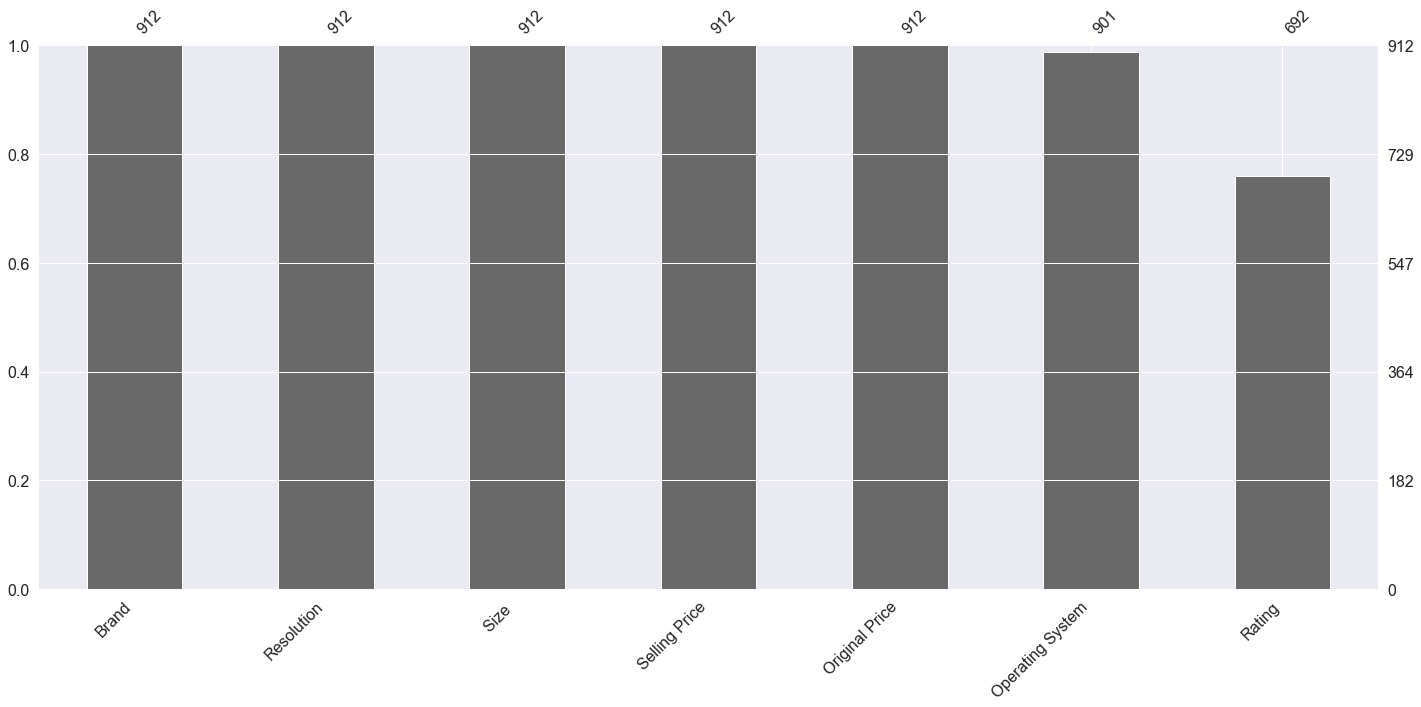

In [6]:
msno.bar(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


Text(0.5, 1.0, 'Pearsons Correlation of Columns')

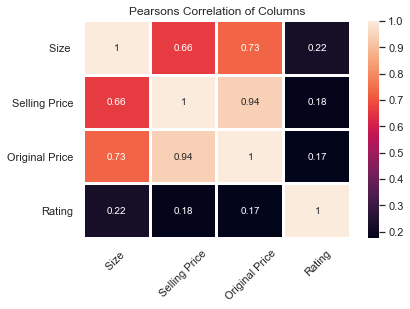

In [8]:
sb.heatmap(df.corr(), annot = True, linewidths = 2)
plt.xticks(rotation = 45)
plt.title("Pearsons Correlation of Columns")

In [9]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


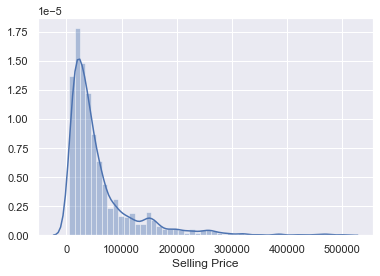

In [10]:
sb.distplot(df["Selling Price"])

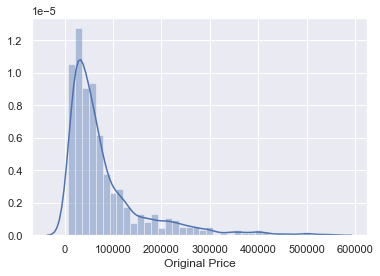

In [11]:
sb.distplot(df["Original Price"])

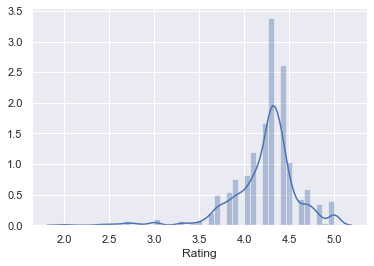

In [12]:
sb.distplot(df["Rating"])

In [13]:
df[["Selling Price", "Original Price", "Rating"]].mean()

Selling Price     59358.606360
Original Price    81975.213816
Rating                4.234104
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

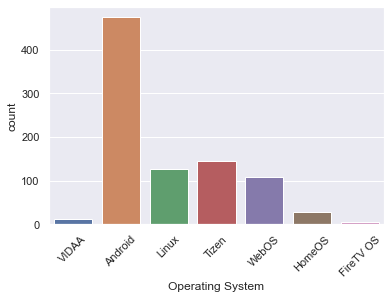

In [14]:
sb.countplot(df['Operating System'])
plt.xticks(rotation = 45)

In [15]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [16]:
rating_avg = df["Rating"].sum() / 912
round(rating_avg, 2)

3.21

In [17]:
print(dir(math), end='')

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']

In [18]:
df["Price Diff"] = df['Original Price'] - df["Selling Price"]
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,realme,HD LED,32,13999,17999,Android,4.3,4000
3,Mi,HD LED,32,14999,19999,Android,4.4,5000
4,realme,HD LED,32,12999,21999,Android,4.3,9000


In [19]:
brand = df.groupby("Brand")
brand["Price Diff"].sum().sort_values(ascending = False)

Brand
LG                  4694988
SAMSUNG             3591973
SONY                2545139
TCL                 1916728
iFFALCON by TCL      869365
Panasonic            654011
PHILIPS              507905
Vu                   448537
Lloyd                408984
Haier                330489
Coocaa               269937
MOTOROLA             246404
Blaupunkt            226809
TOSHIBA              210819
Compaq               185991
Nokia                185500
Akai                 181123
G-TEN                176733
Micromax             166199
Thomson              156991
Candes               138092
Sansui               129223
Mi                   129027
JVC                  129020
Onida                127814
Power Guard          125283
IMPEX                124327
CloudWalker          118438
Croma                111612
Hisense              109946
Acer                 105928
KODAK                102973
Oxygen                99991
Adsun                 87450
DETEL                 80666
MarQ by Flipka

In [20]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
Price Diff            0
dtype: int64

In [21]:
df["Rating"].mean()

4.234104046242774

In [22]:
df["Operating System"].fillna(value="Nill", inplace = True)
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,realme,HD LED,32,13999,17999,Android,4.3,4000
3,Mi,HD LED,32,14999,19999,Android,4.4,5000
4,realme,HD LED,32,12999,21999,Android,4.3,9000


In [23]:
df['Rating'].fillna(value=df["Rating"].mean(), inplace = True)

In [24]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,realme,HD LED,32,13999,17999,Android,4.3,4000
3,Mi,HD LED,32,14999,19999,Android,4.4,5000
4,realme,HD LED,32,12999,21999,Android,4.3,9000


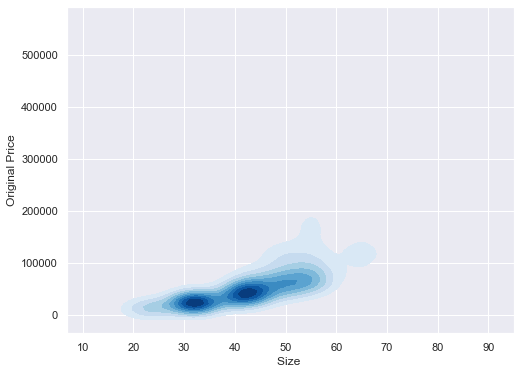

In [25]:
plt.figure(figsize = (8, 6))
sb.kdeplot(data = df["Size "], data2 = df["Original Price"], shade = True, cmap = "Blues", shade_lowest=False)


In [26]:
best_brands = brand["Rating"].sum().round(2).rename("Rating").sort_values(ascending = False).head(20).to_frame()
best_brands

,Rating
Brand,
SAMSUNG,596.77
LG,521.36
SONY,278.30
TCL,185.77
Panasonic,126.08
Micromax,103.30
Vu,100.20
Lloyd,90.64
Mi,82.03


In [27]:
len(df["Brand"].unique())

59

In [28]:
df["Rating"].sum() / len(df['Brand'].unique())

65.44920152836289

In [29]:
best_brands[best_brands["Rating"] >= 65].head(100)

,Rating
Brand,
SAMSUNG,596.77
LG,521.36
SONY,278.30
TCL,185.77
Panasonic,126.08
Micromax,103.30
Vu,100.20
Lloyd,90.64
Mi,82.03


In [30]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,realme,HD LED,32,13999,17999,Android,4.3,4000
3,Mi,HD LED,32,14999,19999,Android,4.4,5000
4,realme,HD LED,32,12999,21999,Android,4.3,9000


In [31]:
brand_org = df.groupby("Brand")
brand_org = brand_org["Original Price", "Rating"].sum().sort_values(by = "Original Price", ascending = False).round(2)
brand_org

<ipython-input-31-04470755fdc7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_org = brand_org["Original Price", "Rating"].sum().sort_values(by = "Original Price", ascending = False).round(2)


,Original Price,Rating
Brand,,
SAMSUNG,18489265,596.77
LG,16518545,521.36
SONY,8084395,278.30
TCL,4371854,185.77
Panasonic,2258830,126.08
iFFALCON by TCL,1899819,81.40
Vu,1521484,100.20
Sharp,1253250,32.10
Lloyd,1160544,90.64


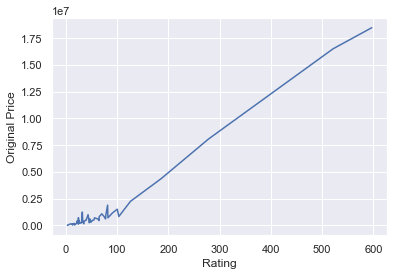

In [32]:
sb.lineplot(y = brand_org['Original Price'], x = brand_org["Rating"])

It is evident that the higher the rate of TV Brand the higher the cost to purchase it. 

In [33]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991
2,realme,HD LED,32,13999,17999,Android,4.3,4000
3,Mi,HD LED,32,14999,19999,Android,4.4,5000
4,realme,HD LED,32,12999,21999,Android,4.3,9000


In [34]:
def percentage_diff():
    return round(((df["Price Diff"] * 100) / df["Original Price"]), 2)

In [35]:
df["Price Increase (%)"] = percentage_diff()

In [36]:
df.head().sort_values(by = "Price Increase (%)", ascending = False)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Price Diff,Price Increase (%)
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,76991,59.23
4,realme,HD LED,32,12999,21999,Android,4.3,9000,40.91
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,16991,30.90
3,Mi,HD LED,32,14999,19999,Android,4.4,5000,25.00
2,realme,HD LED,32,13999,17999,Android,4.3,4000,22.22


In [37]:
brd = df.groupby("Brand")
inc = brd["Price Increase (%)"].sum().sort_values(ascending = False)
inc.head()

Brand
SAMSUNG            2949.81
LG                 2929.82
TCL                1854.38
SONY               1545.98
iFFALCON by TCL     867.34
Name: Price Increase (%), dtype: float64

In [42]:
gh = df["Brand"].unique()
gh

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'